SVM COF

Training Set Evaluation Metrics:
MSE: 0.0019
RMSE: 0.0436
MAE: 0.0188
R-squared: 0.8862

Validation Set Evaluation Metrics:
MSE: 0.0013
RMSE: 0.0355
MAE: 0.0151
R-squared: 0.8830

Test Set Evaluation Metrics:
MSE: 0.0017
RMSE: 0.0414
MAE: 0.0221
R-squared: 0.8754


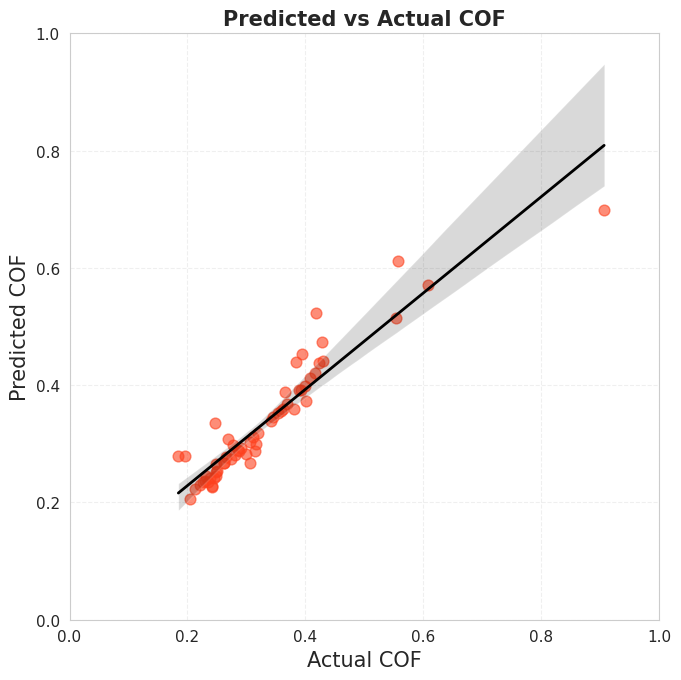

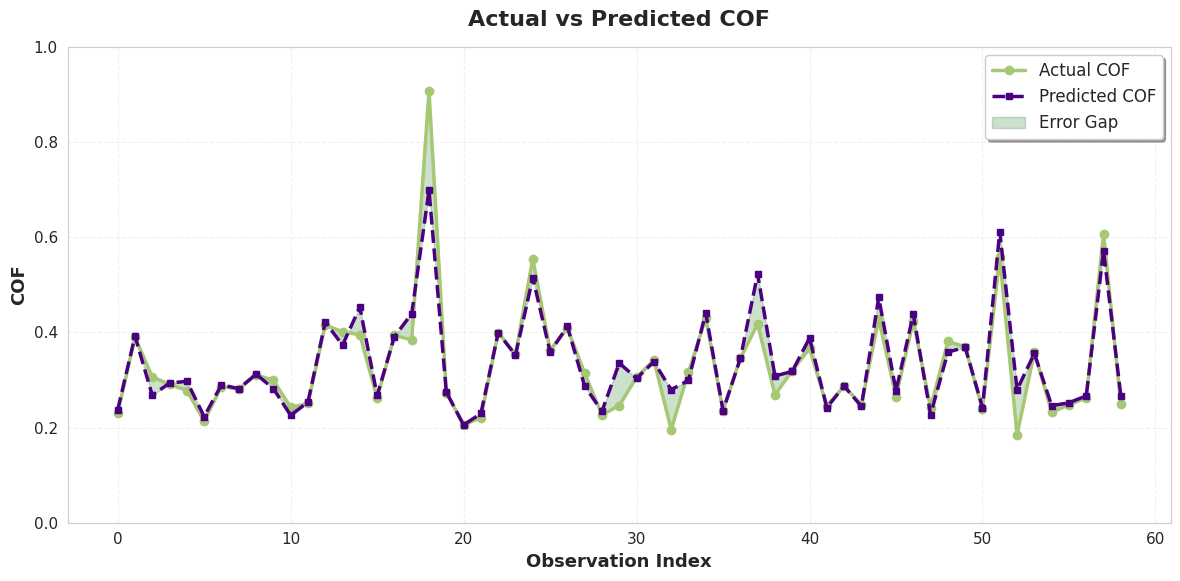

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------- Load and Preprocess Data --------------------
df = pd.read_excel('CoF.xlsx')
df.dropna(inplace=True)

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# -------------------- Data Splitting: 70/15/15 --------------------
total_len = len(df)
train_end = int(0.7 * total_len)
val_end = train_end + int(0.15 * total_len)

train_df = df.iloc[:train_end]
val_df = df.iloc[train_end:val_end]
test_df = df.iloc[val_end:]

# Separate features and target
X_train = train_df.drop(columns=['COF'])
y_train = train_df['COF']
X_val = val_df.drop(columns=['COF'])
y_val = val_df['COF']
X_test = test_df.drop(columns=['COF'])
y_test = test_df['COF']

# -------------------- Pipeline and Model Training --------------------
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', SVR(kernel='rbf', C=750, epsilon=0.005))  # You can tweak C and epsilon
])

pipeline.fit(X_train, y_train)

# -------------------- Evaluation on Training Set --------------------
y_train_pred = pipeline.predict(X_train)
print("Training Set Evaluation Metrics:")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"R-squared: {r2_score(y_train, y_train_pred):.4f}\n")

# -------------------- Evaluation on Validation Set --------------------
y_val_pred = pipeline.predict(X_val)
print("Validation Set Evaluation Metrics:")
print(f"MSE: {mean_squared_error(y_val, y_val_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_val, y_val_pred):.4f}")
print(f"R-squared: {r2_score(y_val, y_val_pred):.4f}\n")

# -------------------- Evaluation on Test Set --------------------
y_pred = pipeline.predict(X_test)
print("Test Set Evaluation Metrics:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R-squared: {r2_score(y_test, y_pred):.4f}")

# -------------------- Visualization Settings --------------------
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 13,
    'axes.labelsize': 15,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

# -------------------- Plot 1: Predicted vs Actual --------------------
plt.figure(figsize=(7, 7))
sns.regplot(
    x=y_test,
    y=y_pred,
    scatter_kws={'alpha': 0.6, 's': 60, 'color': '#FD411E'},
    line_kws={'color': 'black', 'lw': 2}
)
plt.xlabel("Actual COF")
plt.ylabel("Predicted COF")
plt.title("Predicted vs Actual COF", fontsize=15, weight='bold')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------- Plot 2: Observation Line Plot --------------------
plt.figure(figsize=(12, 6))
obs_index = np.arange(len(y_test))

plt.plot(
    obs_index, y_test.values,
    label="Actual COF",
    marker='o', markersize=6, linewidth=2.5,
    color='#A6C875'
)

plt.plot(
    obs_index, y_pred,
    label="Predicted COF",
    marker='s', markersize=5, linestyle='--', linewidth=2.5,
    color='#4B0082'
)

plt.fill_between(
    obs_index, y_test.values, y_pred,
    color='darkgreen', alpha=0.2, label="Error Gap"
)

plt.xlabel("Observation Index", fontsize=13, weight='bold')
plt.ylabel("COF", fontsize=13, weight='bold')
plt.title("Actual vs Predicted COF", fontsize=16, weight='bold', pad=15)
plt.ylim(0, 1)
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


SVM Wear


Training Set Evaluation Metrics:
MSE: 0.00001148
RMSE: 0.00338891
MAE: 0.00299108
R² Score: 0.9281
Validation Set Evaluation Metrics:
MSE: 0.00001338
RMSE: 0.00365792
MAE: 0.0030
R² Score: 0.9135


Test Set Evaluation Metrics:
MSE: 0.00001048
RMSE: 0.00323664
MAE: 0.00271368
R² Score: 0.9343


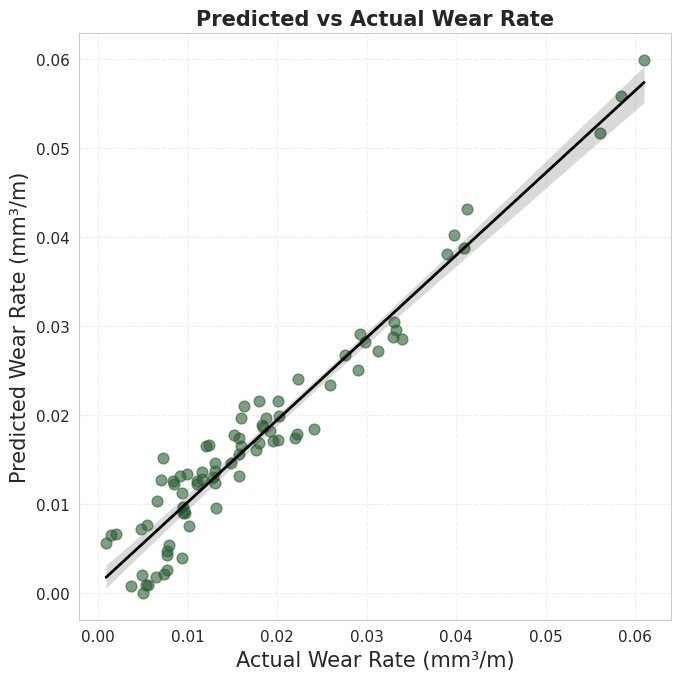

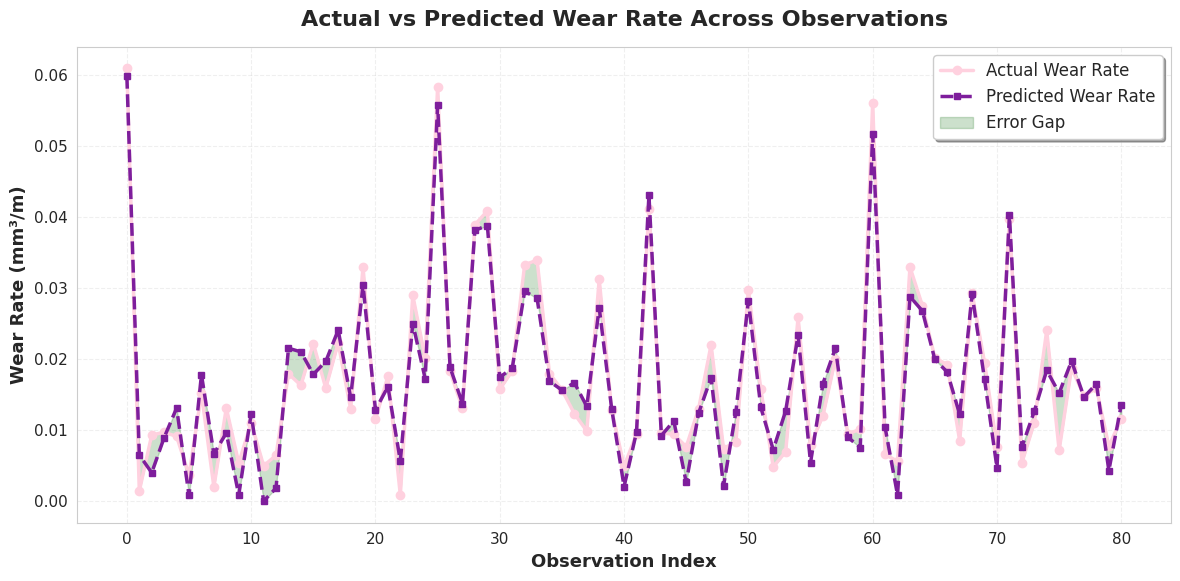

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------- Load and Preprocess Data --------------------
df = pd.read_excel('Wear_rate.xlsx')  # Adjust path if necessary
df.dropna(inplace=True)

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# -------------------- Data Splitting: 70/15/15 --------------------
total_len = len(df)
train_end = int(0.7 * total_len)
val_end = train_end + int(0.15 * total_len)

train_df = df.iloc[:train_end]
val_df = df.iloc[train_end:val_end]
test_df = df.iloc[val_end:]

# Define features and target
X_train = train_df.drop(columns=['Wear rate (mm3/m)'])
y_train = train_df['Wear rate (mm3/m)']
X_val = val_df.drop(columns=['Wear rate (mm3/m)'])
y_val = val_df['Wear rate (mm3/m)']
X_test = test_df.drop(columns=['Wear rate (mm3/m)'])
y_test = test_df['Wear rate (mm3/m)']

# -------------------- Pipeline and Model Training --------------------
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', SVR(kernel='rbf', C=100, epsilon=0.005))
])
pipeline.fit(X_train, y_train)

# -------------------- Evaluation on Training Set --------------------
y_train_pred = pipeline.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Set Evaluation Metrics:")
print(f"MSE: {train_mse:.8f}")
print(f"RMSE: {train_rmse:.8f}")
print(f"MAE: {train_mae:.8f}")
print(f"R² Score: {train_r2:.4f}")

# -------------------- Evaluation on Validation Set --------------------
y_val_pred = pipeline.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Validation Set Evaluation Metrics:")
print(f"MSE: {val_mse:.8f}")
print(f"RMSE: {val_rmse:.8f}")
print(f"MAE: {val_mae:.4f}")
print(f"R² Score: {val_r2:.4f}\n")

# -------------------- Evaluation on Test Set --------------------
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest Set Evaluation Metrics:")
print(f"MSE: {mse:.8f}")
print(f"RMSE: {rmse:.8f}")
print(f"MAE: {mae:.8f}")
print(f"R² Score: {r2:.4f}")

# -------------------- Visualization --------------------
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 13,
    'axes.labelsize': 15,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

# ---- Plot 1: Predicted vs Actual ----
plt.figure(figsize=(7, 7))
sns.regplot(
    x=y_test,
    y=y_pred,
    scatter_kws={'alpha': 0.6, 's': 60, 'color': '#2B5D34'},
    line_kws={'color': 'black', 'lw': 2}
)
plt.xlabel("Actual Wear Rate (mm³/m)")
plt.ylabel("Predicted Wear Rate (mm³/m)")
plt.title("Predicted vs Actual Wear Rate", fontsize=15, weight='bold')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# ---- Plot 2: Line Plot of Observations ----
plt.figure(figsize=(12, 6))
obs_index = np.arange(len(y_test))

plt.plot(
    obs_index, y_test.values,
    label="Actual Wear Rate",
    marker='o', markersize=6, linewidth=2.5,
    color='#FFD1DF'
)
plt.plot(
    obs_index, y_pred,
    label="Predicted Wear Rate",
    marker='s', markersize=5, linestyle='--', linewidth=2.5,
    color='#7E1E9C'
)
plt.fill_between(
    obs_index, y_test.values, y_pred,
    color='darkgreen', alpha=0.2, label="Error Gap"
)

plt.xlabel("Observation Index", fontsize=13, weight='bold')
plt.ylabel("Wear Rate (mm³/m)", fontsize=13, weight='bold')
plt.title("Actual vs Predicted Wear Rate Across Observations", fontsize=16, weight='bold', pad=15)
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
